# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [1]:
cities.head

NameError: name 'cities' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
units = "metric"
counter = 0

lats = []
longs = []
temps = []
humids= []
pressures = []
winds = []
clouds = []
citiesFound = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    try:
        response = requests.get(url).json()
        code = response["cod"]
        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp"])
            humids.append(response["main"]["humidity"])
            pressures.append(response["main"]["pressure"])
            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])
        if counter % 50 == 0:
            print(counter)
    except Exception as e:
        print(e)
    counter += 1
    time.sleep(1)
        

0
50
100
150
200
250
300
350
400
450
500
550
600


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
df = pd.DataFrame()
df["City"] = citiesFound
df["Latitude"] = lats
df["Longitude"] = longs
df["Temperature"] = temps
df["Humidity"] = humids
df["Pressure"] = pressures
df["Wind Speed"] = winds
df["Cloudiness"] = clouds

df.head()

,City,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
0,port alfred,-33.59,26.89,15.56,89,1015,3.30,0
1,atuona,-9.80,-139.03,27.80,79,1011,7.82,2
2,vaini,-21.20,-175.20,27.00,74,1013,5.10,20
3,punta arenas,-53.15,-70.92,7.89,87,1011,6.70,20
4,rikitea,-23.12,-134.97,26.06,84,1013,6.75,100


In [12]:
df.to_csv("weatherData.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         559 non-null    object 
 1   Latitude     559 non-null    float64
 2   Longitude    559 non-null    float64
 3   Temperature  559 non-null    float64
 4   Humidity     559 non-null    int64  
 5   Pressure     559 non-null    int64  
 6   Wind Speed   559 non-null    float64
 7   Cloudiness   559 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 35.1+ KB


In [14]:
df.describe()

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,20.962308,16.230233,16.360233,69.953488,1012.214669,3.419106,50.243292
std,33.325872,90.603074,10.310203,21.456666,8.084261,2.358279,38.911141
min,-54.800000,-179.170000,-12.000000,8.000000,924.000000,0.230000,0.000000
25%,-6.510000,-65.560000,8.985000,58.500000,1010.000000,1.680000,5.000000
50%,26.140000,21.550000,17.000000,75.000000,1013.000000,3.030000,50.000000
75%,49.885000,91.345000,25.125000,86.000000,1017.000000,4.460000,90.000000
max,78.220000,179.320000,34.690000,100.000000,1049.000000,17.000000,100.000000


In [18]:
#  Get the indices of cities that have humidity over 100%.
mask = df.Humidity <= 100
df_sub = df.loc[mask].reset_index(drop=True)
df_sub.head()

,City,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
0,port alfred,-33.59,26.89,15.56,89,1015,3.30,0
1,atuona,-9.80,-139.03,27.80,79,1011,7.82,2
2,vaini,-21.20,-175.20,27.00,74,1013,5.10,20
3,punta arenas,-53.15,-70.92,7.89,87,1011,6.70,20
4,rikitea,-23.12,-134.97,26.06,84,1013,6.75,100


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [19]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
df_sub.to_csv("weatherData_sub.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

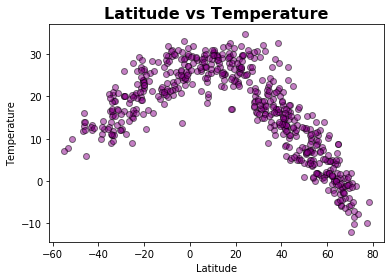

In [30]:
plt.scatter(df.Latitude, df.Temperature, c="darkmagenta", edgecolors="black",
           alpha=0.50)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Humidity Plot

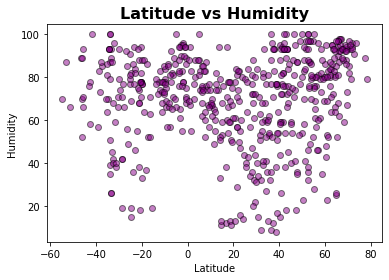

In [31]:
plt.scatter(df.Latitude, df.Humidity, c="darkmagenta", edgecolors="black",
           alpha=0.50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Cloudiness Plot

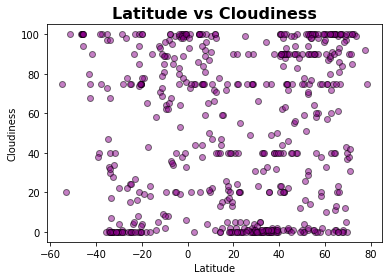

In [32]:
plt.scatter(df.Latitude, df.Cloudiness, c="darkmagenta", edgecolors="black",
           alpha=0.50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontsize=16, fontweight="bold")
plt.show()

## Latitude vs. Wind Speed Plot

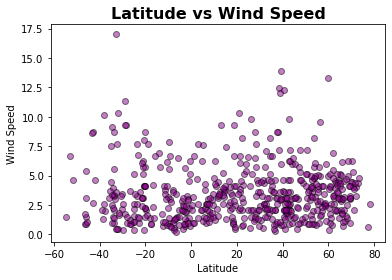

In [34]:
plt.scatter(df.Latitude, df["Wind Speed"], c="darkmagenta", edgecolors="black",
           alpha=0.50)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontsize=16, fontweight="bold")
plt.show()

## Linear Regression

### Create Northern and Southern Hemisphere DataFrames

In [35]:
northernHemi_mask = df.Latitude >= 0
df_north = df.loc[northernHemi_mask].reset_index(drop=True)
df_north.head()

,City,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
0,albany,42.60,-73.97,11.93,76,1006,0.89,88
1,rockland,41.17,-74.05,14.78,72,1007,0.45,62
2,yellowknife,62.46,-114.35,4.43,64,1017,2.60,40
3,camacha,33.08,-16.33,18.00,82,1022,1.50,40
4,caramay,10.18,119.24,30.35,67,1010,4.77,99


In [36]:
southernHemi_mask = df.Latitude < 0
df_south = df.loc[southernHemi_mask].reset_index(drop=True)
df_south.head()

,City,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
0,port alfred,-33.59,26.89,15.56,89,1015,3.30,0
1,atuona,-9.80,-139.03,27.80,79,1011,7.82,2
2,vaini,-21.20,-175.20,27.00,74,1013,5.10,20
3,punta arenas,-53.15,-70.92,7.89,87,1011,6.70,20
4,rikitea,-23.12,-134.97,26.06,84,1013,6.75,100


### Identify Any Correlations

In [39]:
north_corrs = df_north.corr()
north_corrs

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,0.042576,-0.908966,0.256913,-0.063585,0.028268,0.174206
Longitude,0.042576,1.000000,-0.051199,0.142196,-0.255786,-0.027544,0.092197
Temperature,-0.908966,-0.051199,1.000000,-0.462817,0.031512,0.042426,-0.267554
Humidity,0.256913,0.142196,-0.462817,1.000000,-0.145132,-0.033631,0.348320
Pressure,-0.063585,-0.255786,0.031512,-0.145132,1.000000,-0.031121,-0.158205
Wind Speed,0.028268,-0.027544,0.042426,-0.033631,-0.031121,1.000000,0.050365
Cloudiness,0.174206,0.092197,-0.267554,0.348320,-0.158205,0.050365,1.000000


In [40]:
south_corrs = df_south.corr()
south_corrs

,Latitude,Longitude,Temperature,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.044262,0.777237,0.153253,0.062920,-0.188874,0.176331
Longitude,-0.044262,1.000000,0.275400,-0.441564,-0.387290,0.311762,-0.019118
Temperature,0.777237,0.275400,1.000000,-0.126638,-0.105998,0.100696,0.131910
Humidity,0.153253,-0.441564,-0.126638,1.000000,0.057830,-0.338403,0.260408
Pressure,0.062920,-0.387290,-0.105998,0.057830,1.000000,-0.118449,-0.098221
Wind Speed,-0.188874,0.311762,0.100696,-0.338403,-0.118449,1.000000,-0.094778
Cloudiness,0.176331,-0.019118,0.131910,0.260408,-0.098221,-0.094778,1.000000


### Create Heatmap

In [37]:
import seaborn as sn

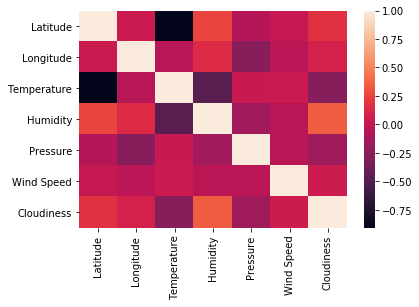

In [41]:
sn.heatmap(north_corrs)

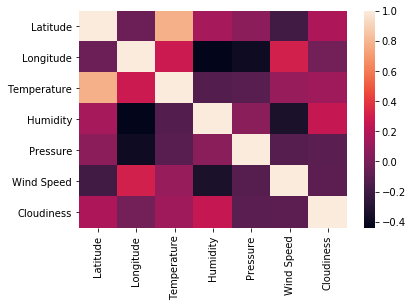

In [42]:
sn.heatmap(south_corrs)

### Linear Regression plots

In [44]:
import statsmodels.api as sm

In [45]:
X = df_north[["Latitude", "Pressure", "Cloudiness"]]
y = df_north[["Temperature"]]

In [46]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     672.3
Date:                Fri, 01 May 2020   Prob (F-statistic):          3.43e-152
Time:                        22:48:45   Log-Likelihood:                -1128.8
No. Observations:                 387   AIC:                             2266.
Df Residuals:                     383   BIC:                             2281.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.7622     32.366      3.237      0.001      41.125     168.400
Latitude      -0.5006      0.012    -42.950      0.000      -0.524      -0.478
Pressure      -0.0679      0.032     -2.128      0.034      -0.131      -0.005
Cloudiness    -0.0344      0.006     -5.690      0.000      -0.046      -0.023
==============================================================================
Omnibus:                       10.681   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.774
Skew:                           0.395   Prob(JB):                      0.00458
Kurtosis:                       3.206   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

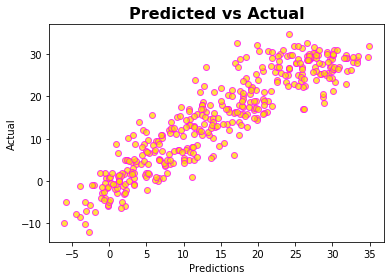

In [69]:
plt.scatter(predictions, y, c="gold", edgecolors="fuchsia",alpha=0.75)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Predicted vs Actual", fontsize=16, fontweight="bold")
plt.show()

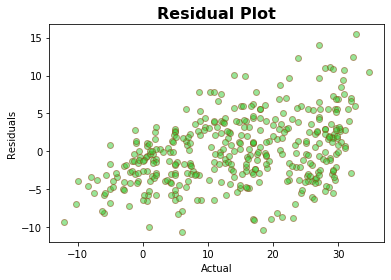

In [70]:
residuals = y.Temperature - predictions

plt.scatter(y, residuals, c="limegreen", edgecolors="saddlebrown",alpha=0.50)
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residual Plot", fontsize=16, fontweight="bold")
plt.show()

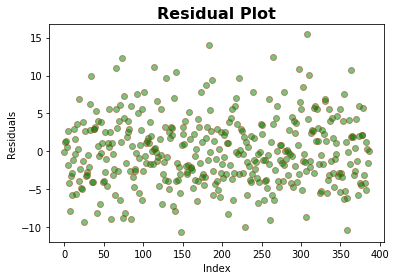

In [71]:
residuals = y.Temperature - predictions

plt.scatter(y.index.values, residuals, c="green", edgecolors="saddlebrown",alpha=0.50)
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual Plot", fontsize=16, fontweight="bold")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8262184894042816


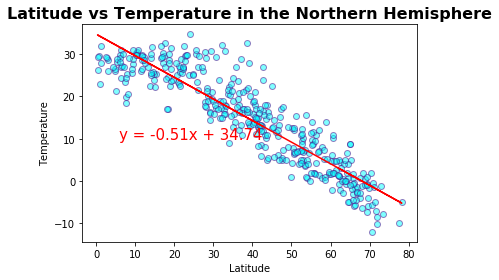

In [79]:
x_values = df_north['Latitude']
y_values = df_north['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature in the Northern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6040969632324615


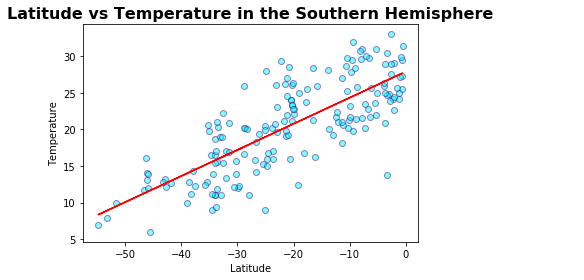

In [80]:
x_values = df_south['Latitude']
y_values = df_south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature in the Southern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06600443297614467


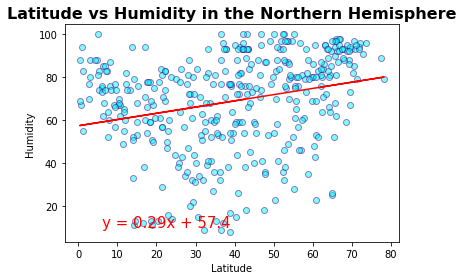

In [81]:
x_values = df_north['Latitude']
y_values = df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity in the Northern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02348653672366373


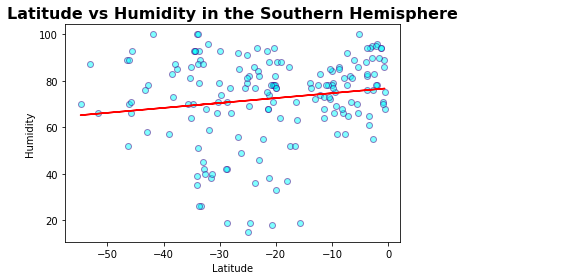

In [82]:
x_values = df_south['Latitude']
y_values = df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity in the Southern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.030347647305325978


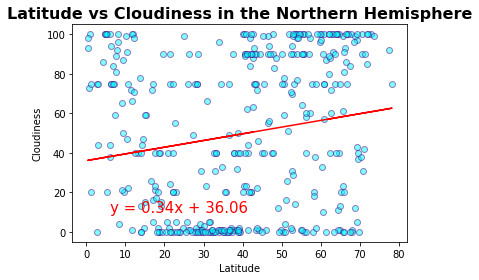

In [83]:
x_values = df_north['Latitude']
y_values = df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness in the Northern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.031092552863927814


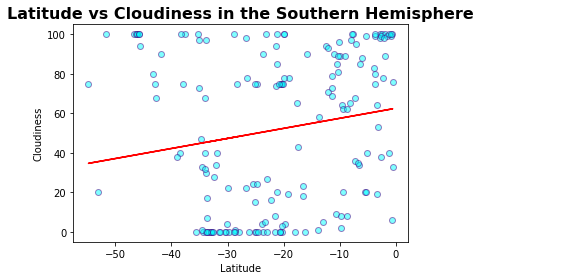

In [84]:
x_values = df_south['Latitude']
y_values = df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness in the Southern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0007990887640957461


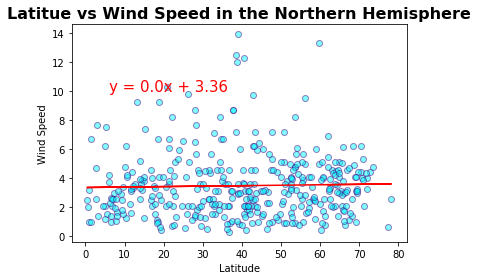

In [78]:
x_values = df_north['Latitude']
y_values = df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed in the Northern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03567337780072587


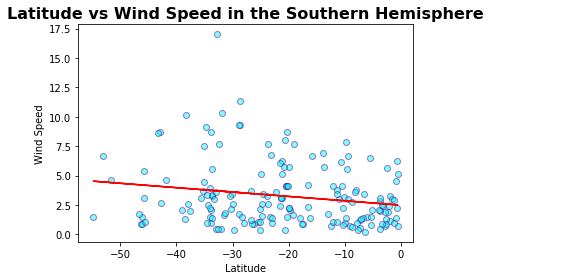

In [85]:
x_values = df_south['Latitude']
y_values = df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, c="cyan", edgecolors="indigo",alpha=0.50)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed in the Southern Hemisphere", fontsize=16, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()